In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve ,auc
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [2]:
df = pd.read_csv('hospital.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
f = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', ]

data = np.asanyarray(df[f])
y = np.asanyarray(df['output'])



In [7]:
from sklearn.preprocessing import scale
x = scale(data)
x

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [8]:
x_train, x_test ,y_train , y_test=train_test_split(x,y , test_size=0.2 , random_state=42)


<h1>KNeighborsClassifier</h1>

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [11]:
knn_pred=knn.predict(x_test)

In [36]:
print('accuracy :', metrics.accuracy_score(y_test,knn_pred))
print('score test:',knn.score(x_test,y_test))
print('score train:',knn.score(x_train,y_train))

accuracy : 0.9180327868852459
score test: 0.9180327868852459
score train: 0.8589211618257261


In [13]:
def func1(cm, classes,normalize=False,title='Confusion matrix',
          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
knn_matrix = confusion_matrix (y_test,knn_pred)
print (classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Confusion matrix, without normalization
[[28  1]
 [ 4 28]]


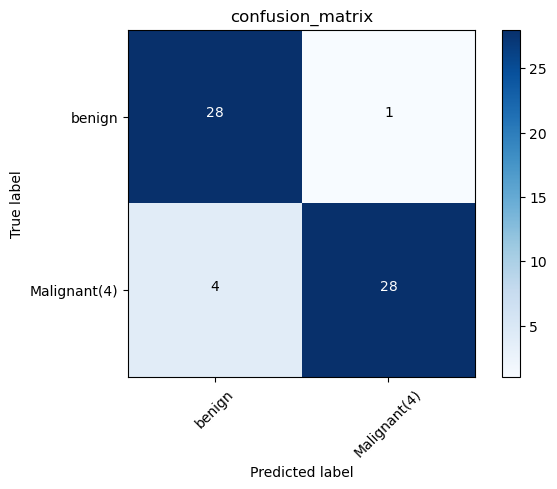

In [15]:
plt.figure()
func1(knn_matrix,classes=['benign','Malignant(4)'],normalize=False ,title='confusion_matrix')

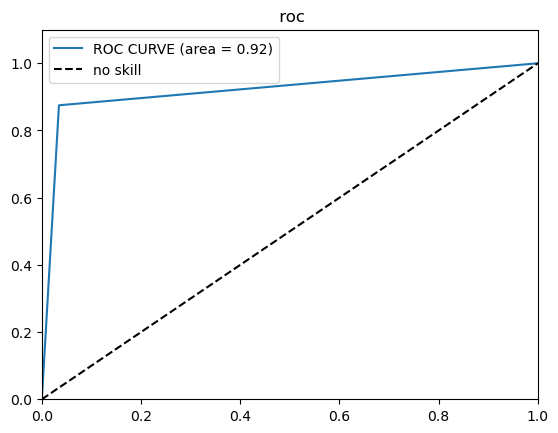

In [16]:
fbr , tpr , thresholds = roc_curve(y_test , knn_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)
plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0 , 1.1])
plt.title(' roc')
plt.legend()
plt.show()

<h1>DecisionTreeClassifier</h1>

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train[0:200],y_train[0:200])
tree_pred=dtree.predict(x_test)

In [37]:
print('accuracy :', metrics.accuracy_score(y_test,tree_pred))
print('score test:',dtree.score(x_test,y_test))
print('score train:',dtree.score(x_train,y_train))

accuracy : 0.8032786885245902
score test: 0.8032786885245902
score train: 0.9377593360995851


              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61

Confusion matrix, without normalization
[[27  2]
 [10 22]]


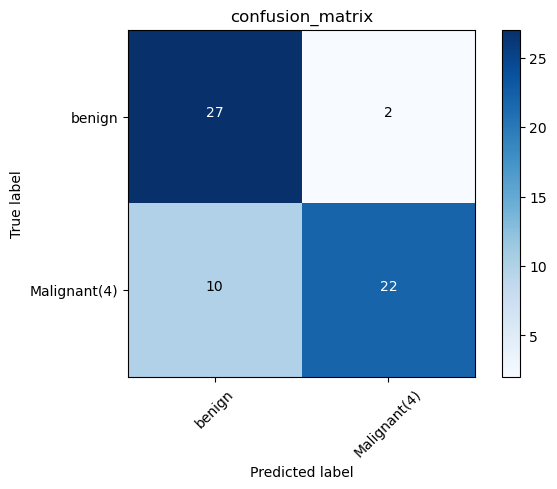

In [20]:
tree_matrix = confusion_matrix (y_test[0:200],tree_pred[0:200])
print (classification_report(y_test,tree_pred))
plt.figure()
func1(tree_matrix,classes=['benign','Malignant(4)'],normalize=False ,title='confusion_matrix')

[Text(0.6299342105263158, 0.9375, 'thall <= 0.303\ngini = 0.495\nsamples = 200\nvalue = [90, 110]'),
 Text(0.41776315789473684, 0.8125, 'caa <= -0.217\ngini = 0.362\nsamples = 122\nvalue = [29, 93]'),
 Text(0.28289473684210525, 0.6875, 'oldpeak <= 0.567\ngini = 0.217\nsamples = 89\nvalue = [11, 78]'),
 Text(0.17105263157894737, 0.5625, 'age <= 0.452\ngini = 0.137\nsamples = 81\nvalue = [6, 75]'),
 Text(0.07894736842105263, 0.4375, 'trtbps <= -1.289\ngini = 0.031\nsamples = 63\nvalue = [1, 62]'),
 Text(0.05263157894736842, 0.3125, 'sex <= -0.391\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.02631578947368421, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.07894736842105263, 0.1875, 'trtbps <= -1.574\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05263157894736842, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10526315789473684, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.3125, 'gini = 0.0\nsamples = 56\nvalue =

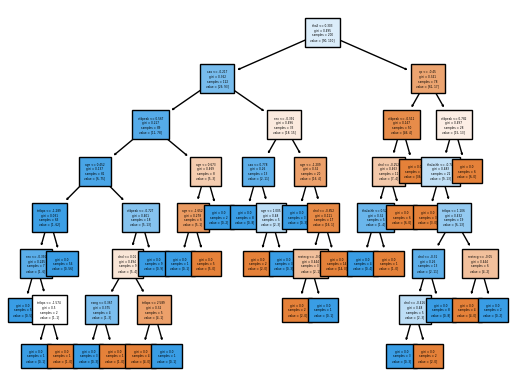

In [21]:
tree.plot_tree(dtree,feature_names=f , filled=True , fontsize=2)


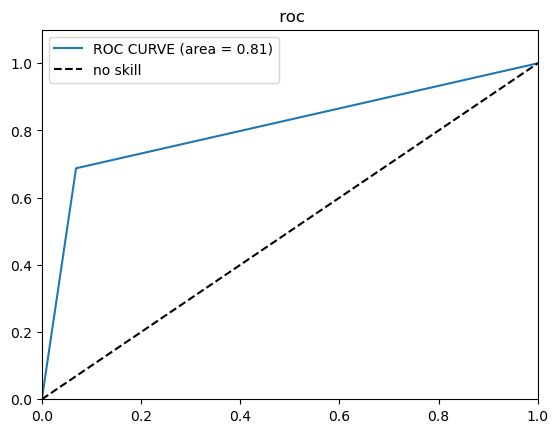

In [22]:
fbr , tpr , thresholds = roc_curve(y_test , tree_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)
plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0 , 1.1])
plt.title(' roc')
plt.legend()
plt.show()

<h1>svm</h1>

In [23]:
from  sklearn.svm import SVC

In [24]:
cl = SVC(kernel = 'rbf')
cl.fit(x_train,y_train)
svm_pred = cl.predict(x_test)


In [39]:
print('accuracy :', metrics.accuracy_score(y_test,svm_pred))
print('score test:',cl.score(x_test,y_test))
print('score train:',cl.score(x_train,y_train))

accuracy : 0.8688524590163934
score test: 0.8688524590163934
score train: 0.9087136929460581


              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Confusion matrix, without normalization
[[27  2]
 [ 6 26]]


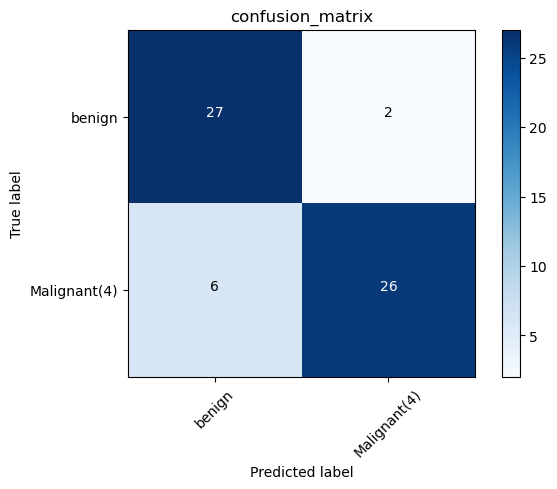

In [26]:
svm_matrix = confusion_matrix (y_test,svm_pred)
print (classification_report(y_test,svm_pred))
plt.figure()
func1(svm_matrix,classes=['benign','Malignant(4)'],normalize=False ,title='confusion_matrix')

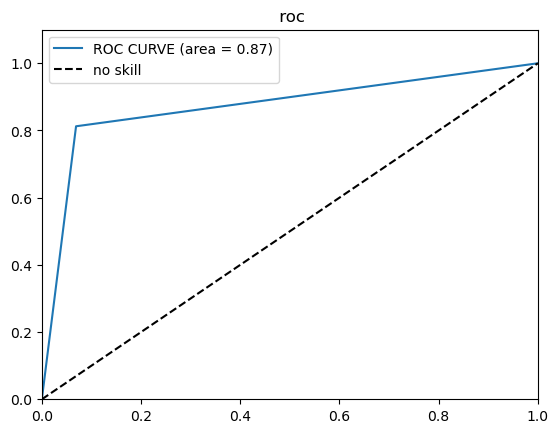

In [27]:
fbr , tpr , thresholds = roc_curve(y_test , svm_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)
plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0 , 1.1])
plt.title(' roc')
plt.legend()
plt.show()

<h1>LogisticRegression</h1>

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lo = LogisticRegression()
lo.fit(x_train,y_train)
lo_pred=lo.predict(x_test)

In [38]:
print('accuracy :', metrics.accuracy_score(y_test,lo_pred))
print('score test:',lo.score(x_test,y_test))
print('score train:',lo.score(x_train,y_train))

accuracy : 0.819672131147541
score test: 0.819672131147541
score train: 0.8589211618257261


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix, without normalization
[[27  2]
 [10 22]]


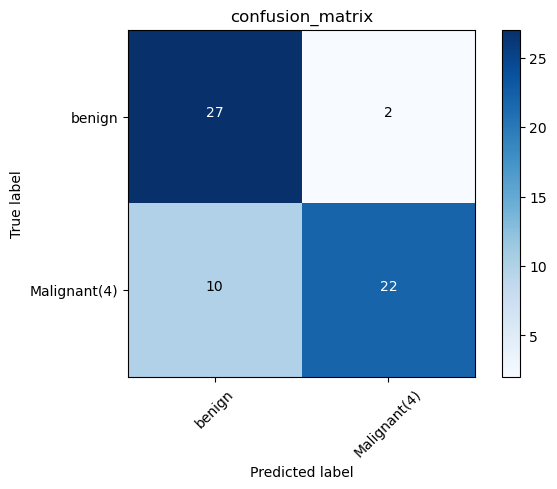

In [31]:
lo_matrix = confusion_matrix (y_test,tree_pred)
print (classification_report(y_test,lo_pred))
plt.figure()
func1(tree_matrix,classes=['benign','Malignant(4)'],normalize=False ,title='confusion_matrix')

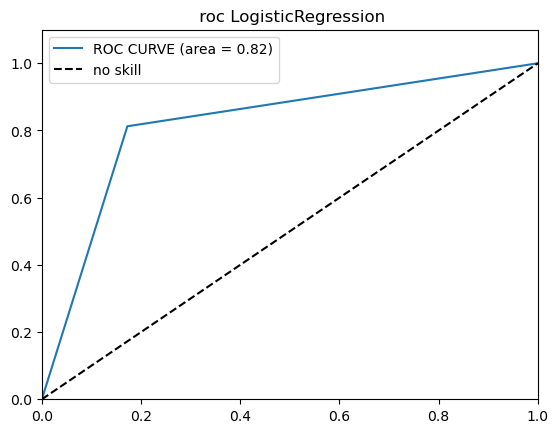

In [32]:
fbr , tpr , thresholds = roc_curve(y_test , lo_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)
plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0 , 1.1])
plt.title(' roc LogisticRegression')
plt.legend()
plt.show()